In [19]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from config import api_key
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
%matplotlib inline

In [20]:
quandl.ApiConfig.api_key = api_key
#Variance Risk Premium: https://sites.google.com/site/haozhouspersonalhomepage
#EOM Nominal S&P, Nominal Dividends / Nominal Risk Free Rate: http://www.hec.unil.ch/agoyal/
#Consumer Sentiment: http://www.sca.isr.umich.edu/

In [21]:
#Import Main DataFrame
file = '1989_2018_Data.csv'

data = pd.read_csv(file)
df_all = pd.DataFrame(data)
df_all = df_all.set_index('Date')

df_all.head()
df_all.tail()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
Date,,,,,,,,,,,,,,
1990-03-31,339.94,11.318,0.006583,8.28,26.5978,91.3,30.035342,-1.57,31.806967,-3.0,2.051350,-3.055940,1.558067,-4.674200
1990-04-30,330.80,11.433,0.006475,8.26,26.2753,93.9,28.933788,-1.58,28.596933,2.4,-3.055940,8.844823,-5.107289,-12.257494
1990-05-31,361.23,11.548,0.006450,8.18,19.2201,90.6,31.280741,-1.63,24.031067,-0.1,8.844823,-1.263740,11.900762,-1.190076
1990-06-30,358.02,11.663,0.006442,8.29,13.0796,88.3,30.697076,-1.24,19.525000,-2.3,-1.263740,-0.884521,-10.108562,23.249693
1990-07-31,356.15,11.720,0.006350,8.15,26.9870,88.2,30.388225,-1.09,19.762233,-3.8,-0.884521,-9.776690,0.379219,-1.441033


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
Date,,,,,,,,,,,,,,
2018-08-31,2901.52,52.31,0.001725,1.91,8.5030,96.2,55.467788,0.75,9.972800,-0.6,3.008606,0.401621,-0.586791,0.352075
2018-09-30,2913.98,52.70,0.001792,1.95,7.9528,100.1,55.293738,0.80,8.198900,5.0,0.401621,-6.979372,-2.606985,-13.034925
2018-10-31,2711.74,53.08,0.001908,2.19,-2.2509,98.6,51.087792,1.04,4.734967,-2.1,-6.979372,1.757751,-7.380993,15.500086
2018-11-30,2760.17,53.74,0.001933,2.20,2.7329,97.5,51.361556,1.04,2.811600,-1.0,1.757751,-9.213515,8.737123,-8.737123
2018-12-31,2506.85,54.38,0.002000,2.27,-4.0034,98.3,46.098750,0.97,-1.173800,2.4,-9.213515,NaN,-10.971266,-26.331038


In [22]:
#Import 2004 - 2018 DataFrame with Google
df_goog = '2004_to_2018_withGoogle.csv'

df_goog = pd.read_csv(df_goog)
df0418 = pd.DataFrame(df_goog)

df0418 = df0418.set_index('Date')
df0418.head()
df0418.tail()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
Date,,,,,,,,,,,,,,,,,
2004-01-31,1131.13,17.598000,0.000733,1.00,14.0860,103.8,64.276054,-0.24,16.151067,21.4,1.786198,1.274621,-3.352254,-71.738239,28.0,0.273743,0.160482
2004-02-29,1144.94,17.811000,0.000775,1.01,9.8728,94.4,64.282747,-0.25,14.917533,14.5,1.274621,-1.583041,-0.511577,-7.417861,28.0,0.000000,-0.273743
2004-03-31,1126.21,18.024000,0.000783,1.00,9.4462,95.8,62.483910,-0.25,11.135000,18.2,-1.583041,-1.622623,-2.857662,-52.009454,26.0,-2.000000,-2.000000
2004-04-30,1107.30,18.216667,0.000783,1.00,13.4427,94.2,60.784995,-0.26,10.920567,8.2,-1.622623,1.261890,-0.039582,-0.324572,25.0,-1.000000,1.000000
2004-05-31,1120.68,18.409333,0.000850,1.00,5.2403,90.2,60.875643,-0.26,9.376400,-1.9,1.261890,1.831398,2.884513,-5.480574,23.0,-2.000000,-1.000000


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
Date,,,,,,,,,,,,,,,,,
2018-08-31,2901.52,52.31,0.001725,1.91,8.5030,96.2,55.467788,0.75,9.972800,-0.6,3.008606,0.401621,-0.586791,0.352075,33.0,1.0,1.0
2018-09-30,2913.98,52.70,0.001792,1.95,7.9528,100.1,55.293738,0.80,8.198900,5.0,0.401621,-6.979372,-2.606985,-13.034925,31.0,-2.0,-3.0
2018-10-31,2711.74,53.08,0.001908,2.19,-2.2509,98.6,51.087792,1.04,4.734967,-2.1,-6.979372,1.757751,-7.380993,15.500086,62.0,31.0,33.0
2018-11-30,2760.17,53.74,0.001933,2.20,2.7329,97.5,51.361556,1.04,2.811600,-1.0,1.757751,-9.213515,8.737123,-8.737123,48.0,-14.0,-45.0
2018-12-31,2506.85,54.38,0.002000,2.27,-4.0034,98.3,46.098750,0.97,-1.173800,2.4,-9.213515,NaN,-10.971266,-26.331038,77.0,29.0,43.0


In [23]:
#Create DataFrame for 1990-03 to 2017-12:
dfx = df_all['1990-04':'2018-01']

#Create DataFrame for 2004 to 2017
df04 = df0418['2004':'2018']


In [24]:
df04.head()
df04.tail()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
Date,,,,,,,,,,,,,,,,,
2004-01-31,1131.13,17.598000,0.000733,1.00,14.0860,103.8,64.276054,-0.24,16.151067,21.4,1.786198,1.274621,-3.352254,-71.738239,28.0,0.273743,0.160482
2004-02-29,1144.94,17.811000,0.000775,1.01,9.8728,94.4,64.282747,-0.25,14.917533,14.5,1.274621,-1.583041,-0.511577,-7.417861,28.0,0.000000,-0.273743
2004-03-31,1126.21,18.024000,0.000783,1.00,9.4462,95.8,62.483910,-0.25,11.135000,18.2,-1.583041,-1.622623,-2.857662,-52.009454,26.0,-2.000000,-2.000000
2004-04-30,1107.30,18.216667,0.000783,1.00,13.4427,94.2,60.784995,-0.26,10.920567,8.2,-1.622623,1.261890,-0.039582,-0.324572,25.0,-1.000000,1.000000
2004-05-31,1120.68,18.409333,0.000850,1.00,5.2403,90.2,60.875643,-0.26,9.376400,-1.9,1.261890,1.831398,2.884513,-5.480574,23.0,-2.000000,-1.000000


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
Date,,,,,,,,,,,,,,,,,
2017-08-31,2471.649902,47.855075,0.000842,1.16,4.5638,96.8,51.648647,0.76,5.472033,7.0,0.131911,2.006883,-1.877269,-13.140885,27.0,4.0,6.0
2017-09-30,2519.360107,48.173103,0.000858,1.15,4.9171,95.1,52.298066,0.75,5.112567,3.9,2.006883,2.289827,1.874972,7.312391,24.0,-3.0,-7.0
2017-10-31,2575.260010,48.426075,0.000892,1.15,6.5894,100.7,53.179202,0.75,5.356767,13.5,2.289827,0.427026,0.282943,3.819735,29.0,5.0,8.0
2017-11-30,2584.840088,48.679047,0.001025,1.16,6.9722,98.5,53.099644,0.75,6.159567,4.7,0.427026,3.482009,-1.862801,-8.755164,32.0,3.0,-2.0
2017-12-31,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,-2.3,3.482009,5.655427,3.054983,-7.026461,34.0,2.0,-1.0


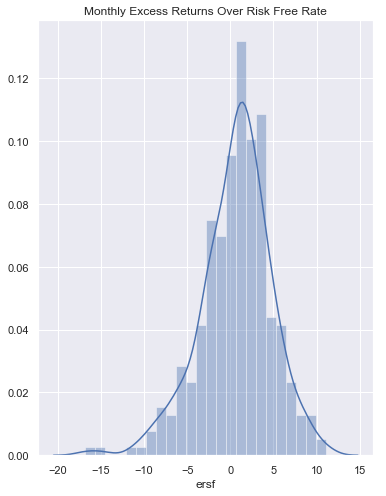

In [25]:
#Simple Histogram of Monthly Excess Returns
sns.set()
fig = plt.figure(figsize=(6,8))
ax1 = sns.distplot(dfx['ersf'], bins=24).set_title('Monthly Excess Returns Over Risk Free Rate');

In [26]:
#Central Tendencies & Correlations
dfx.describe()
dfx.corr()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,1165.786487,22.429737,0.002258,2.921862,17.280045,86.827327,52.111918,-0.285285,17.347039,0.185886,0.653912,0.680072,0.004296,-3.632628
std,542.627083,10.215481,0.001871,2.394143,13.940951,12.500921,14.174015,1.406175,11.123650,10.067313,4.105890,4.109931,5.691810,57.500143
min,304.000000,11.433000,0.000008,0.070000,-9.724000,55.300000,25.507636,-4.580000,3.052700,-30.000000,-16.793245,-16.793245,-13.574290,-294.411915
25%,786.160000,15.059000,0.000175,0.220000,8.306000,77.600000,44.277209,-0.750000,9.451900,-4.300000,-1.678295,-1.640350,-3.688271,-18.280629
50%,1160.330000,17.811000,0.002392,3.000000,13.375900,88.900000,51.095887,-0.030000,13.567133,1.100000,1.016117,1.029038,-0.039582,-0.220260
75%,1416.180000,27.632333,0.004108,5.250000,23.057600,95.000000,58.382692,0.300000,23.181300,6.500000,3.335128,3.346946,3.335128,13.263431
max,2673.610107,48.932019,0.006475,8.290000,80.610800,112.000000,92.170533,2.670000,59.880367,22.800000,11.090639,11.090639,20.864358,279.621622


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
Index,1.000000,0.901908,-0.545196,-0.523246,-0.252827,0.175651,0.401281,0.257768,-0.300900,0.117127,0.047037,-0.028506,0.003087,0.040805
D12,0.901908,1.000000,-0.665103,-0.648067,-0.266464,-0.103528,-0.021267,0.152813,-0.337560,0.097407,0.018131,0.024473,0.004374,0.025713
Rfree,-0.545196,-0.665103,1.000000,0.995602,0.098447,0.428251,0.084074,0.152424,0.111468,-0.137667,-0.020206,-0.020168,-0.011726,0.012502
fed_funds,-0.523246,-0.648067,0.995602,1.000000,0.109217,0.414895,0.102005,0.131072,0.126078,-0.173812,-0.026029,-0.023169,-0.008300,0.003489
VRP,-0.252827,-0.266464,0.098447,0.109217,1.000000,-0.088586,0.048584,-0.302130,0.798303,-0.186185,-0.236599,0.150612,-0.112031,-0.047586
ICS_ALL,0.175651,-0.103528,0.428251,0.414895,-0.088586,1.000000,0.591973,0.418733,-0.110263,0.413738,0.046807,-0.000474,-0.060364,0.048156
pd,0.401281,-0.021267,0.084074,0.102005,0.048584,0.591973,1.000000,0.201392,0.093368,0.028392,0.034130,-0.120537,-0.000299,0.029615
ff12_D,0.257768,0.152813,0.152424,0.131072,-0.302130,0.418733,0.201392,1.000000,-0.358753,0.349899,0.130179,0.139509,0.000705,0.039779
vrp3,-0.300900,-0.337560,0.111468,0.126078,0.798303,-0.110263,0.093368,-0.358753,1.000000,-0.205346,0.038843,0.211385,0.076528,-0.167945
sent12_D,0.117127,0.097407,-0.137667,-0.173812,-0.186185,0.413738,0.028392,0.349899,-0.205346,1.000000,0.171004,0.096015,-0.063600,0.052714


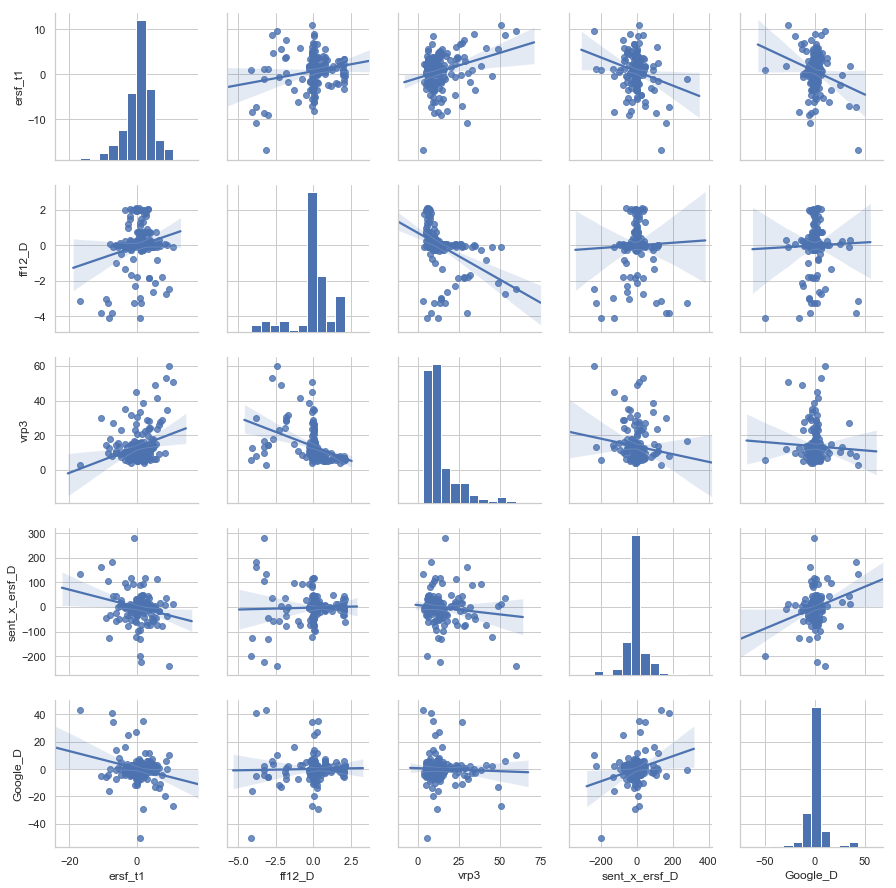

In [27]:
#Pairplot of Target, Dependent Variables
sns.set(style='whitegrid', palette='deep')
sns.pairplot(df04, vars=['ersf_t1','ff12_D', 'vrp3', 'sent_x_ersf_D', 'Google_D'],
                 kind='reg');

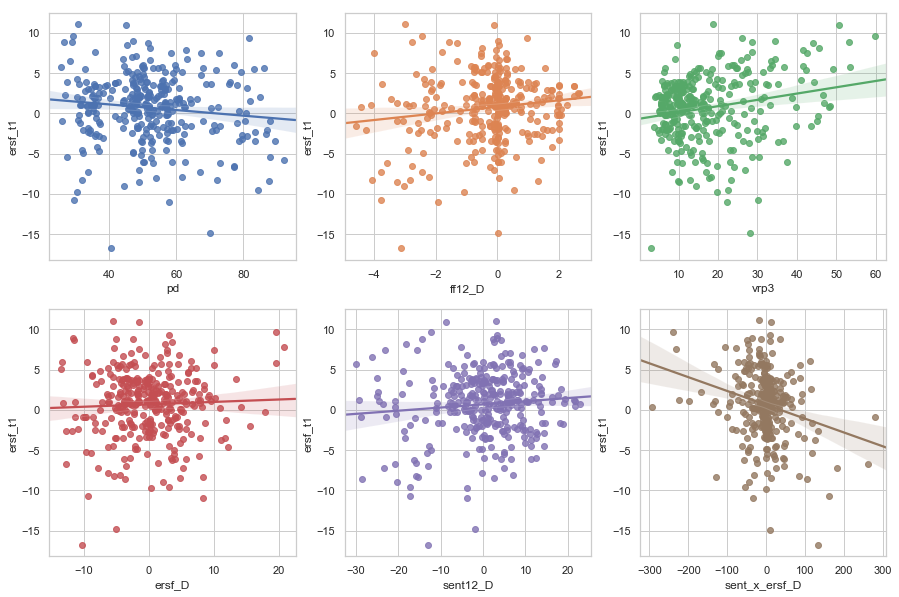

In [28]:
#Correlation Plots for baseline variables
sns.set(style='whitegrid', palette='deep')
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(15, 10))

sns.regplot(x='pd', y='ersf_t1', data=dfx, ax=axs[0,0])
sns.regplot(x='ff12_D', y='ersf_t1', data=dfx, ax=axs[0,1])
sns.regplot(x='vrp3', y='ersf_t1', data=dfx, ax=axs[0,2])
sns.regplot(x='ersf_D', y='ersf_t1', data=dfx, ax=axs[1,0])
sns.regplot(x='sent12_D', y='ersf_t1', data=dfx, ax=axs[1,1])
sns.regplot(x='sent_x_ersf_D', y='ersf_t1', data=dfx, ax=axs[1,2]);

## Regression Models without Google

In [29]:
#Regression Model with the following variables: Price-Dividend / Fed_Funds_Rate / Variance Risk Premium / Sentiment X Momentum
lr_model_no_google = ols(formula='ersf_t1~pd+ff12_D+vrp3+sent_x_ersf_D', data=dfx).fit()
lr_model_no_google.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ersf_t1   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     17.64
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           3.96e-13
Time:                        15:05:02   Log-Likelihood:                -910.22
No. Observations:                 333   AIC:                             1830.
Df Residuals:                     328   BIC:                             1849.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9954      0.831      2.402      0.017       0.361       3.630
pd               -0.0589      0.015     -3.899      0.000      -0.089      -0.029
ff12_D            0.8690      0.162      5.357      0.000       0.550       1.188
vrp3              0.1124      0.020      5.494      0.000       0.072       0.153
sent_x_ersf_D    -0.0139      0.004     -3.828      0.000      -0.021      -0.007
==============================================================================
Omnibus:                       30.347   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.286
Skew:                          -0.663   Prob(JB):                     1.79e-09
Kurtosis:                       4.071   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#Run same Linear Regression with sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

ind_variables = ['pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D']
X = pd.DataFrame(dfx, columns=ind_variables)
y = pd.DataFrame(dfx, columns=['ersf_t1'])

sk_model_no_google = linear_model.LinearRegression()
model = sk_model_no_google.fit(X,y)

In [31]:
#Predicting January 2018 Returns
predictions = model.predict(X)
print(predictions[-1])

[0.2737012]


In [32]:
#sklearn R-Squared Value, Coefficients, Intercept
model.score(X,y), model.coef_, model.intercept_

(0.17705863271838274,
 array([[-0.05887827,  0.86898879,  0.1124268 , -0.01392592]]),
 array([1.99538212]))

## Exploring Google Trends Impact

In [33]:
#Coefficients with Google Trends - Change in Searches for the Term "Stock Market"
df04.describe()
df04.corr()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,1522.179168,30.249718,0.000999,1.341131,13.576756,81.947619,50.869848,-0.008988,13.648133,0.652976,0.667949,0.690980,-0.009860,-2.599680,25.440476,0.037344,0.011231
std,443.859461,8.958708,0.001367,1.769762,12.989038,11.785792,6.591079,1.259412,10.059378,10.351389,3.886939,3.905026,5.113633,58.594285,9.801443,9.600349,14.596382
min,735.090000,17.598000,0.000008,0.070000,-9.470800,55.300000,26.602531,-4.100000,3.052700,-29.200000,-16.793245,-16.793245,-11.633423,-238.769031,14.000000,-50.000000,-91.000000
25%,1190.170000,22.992000,0.000056,0.127500,5.828050,73.575000,47.992094,-0.090000,7.129600,-4.350000,-1.407628,-1.407628,-3.601212,-16.721380,20.000000,-3.000000,-2.000000
50%,1378.935000,27.556500,0.000183,0.230000,9.963050,83.050000,51.074718,0.030000,10.431000,1.900000,1.036320,1.036320,-0.055229,-0.272416,23.000000,0.000000,1.000000
75%,1924.500000,37.473505,0.001448,2.002500,17.149400,92.025000,55.652819,0.407500,14.947467,7.100000,2.996938,3.008325,2.903168,12.706484,27.000000,2.000000,4.000000
max,2673.610107,48.932019,0.004192,5.260000,77.816100,103.800000,64.282747,2.070000,59.880367,21.800000,10.959159,10.959159,19.571232,279.621622,100.000000,43.000000,49.000000


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
Index,1.000000,0.926910,-0.197435,-0.189128,-0.377489,0.579347,0.091090,0.240900,-0.460633,0.233288,0.131134,0.039784,0.004965,0.056154,0.082610,0.031602,0.021439
D12,0.926910,1.000000,-0.372532,-0.355154,-0.198381,0.361418,-0.283143,-0.030664,-0.265411,0.135172,0.042347,0.061087,0.014146,0.025965,0.234291,0.018707,0.001663
Rfree,-0.197435,-0.372532,1.000000,0.991658,-0.270263,0.267316,0.477579,0.422660,-0.363454,-0.243364,-0.069381,-0.088300,-0.019006,0.050823,-0.101470,0.027062,0.009706
fed_funds,-0.189128,-0.355154,0.991658,1.000000,-0.268302,0.230430,0.448993,0.357401,-0.355477,-0.281639,-0.088243,-0.109110,-0.018672,0.047813,-0.077483,0.034542,0.013225
VRP,-0.377489,-0.198381,-0.270263,-0.268302,1.000000,-0.483545,-0.468140,-0.371260,0.769026,-0.060501,-0.240775,0.204762,-0.122761,0.018431,0.009761,-0.093908,-0.114858
ICS_ALL,0.579347,0.361418,0.267316,0.230430,-0.483545,1.000000,0.582132,0.635770,-0.599270,0.489859,0.109358,0.056348,-0.062101,0.015227,-0.063983,0.032589,0.043246
pd,0.091090,-0.283143,0.477579,0.448993,-0.468140,0.582132,1.000000,0.706587,-0.512646,0.231991,0.195010,-0.070603,-0.030940,0.068783,-0.363775,0.032186,0.042797
ff12_D,0.240900,-0.030664,0.422660,0.357401,-0.371260,0.635770,0.706587,1.000000,-0.418635,0.347842,0.212527,0.199452,-0.012541,0.034151,-0.330206,0.025709,0.019488
vrp3,-0.460633,-0.265411,-0.363454,-0.355477,0.769026,-0.599270,-0.512646,-0.418635,1.000000,-0.004952,0.072134,0.287742,0.087702,-0.130402,0.032049,-0.046311,-0.041067
sent12_D,0.233288,0.135172,-0.243364,-0.281639,-0.060501,0.489859,0.231991,0.347842,-0.004952,1.000000,0.267856,0.194197,-0.049284,-0.064181,-0.232290,0.001956,0.035123


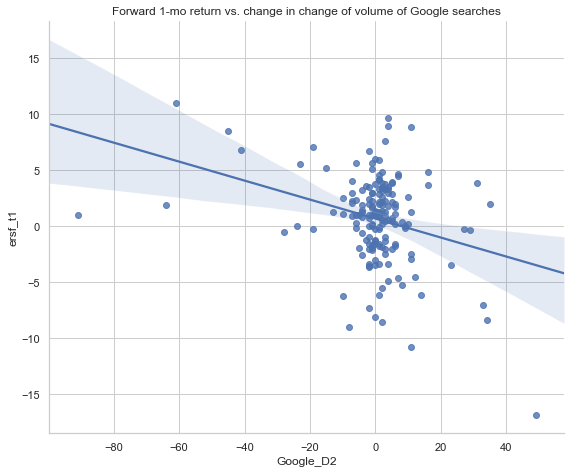

In [34]:
#Google Searches Change - Correlation with Target Variable
sns.set_style('whitegrid')
ax = sns.lmplot( x='Google_D2', y='ersf_t1', data=df04, fit_reg=True)
ax.fig.set_size_inches(9,7)
plt.title('Forward 1-mo return vs. change in change of volume of Google searches')
plt.show();

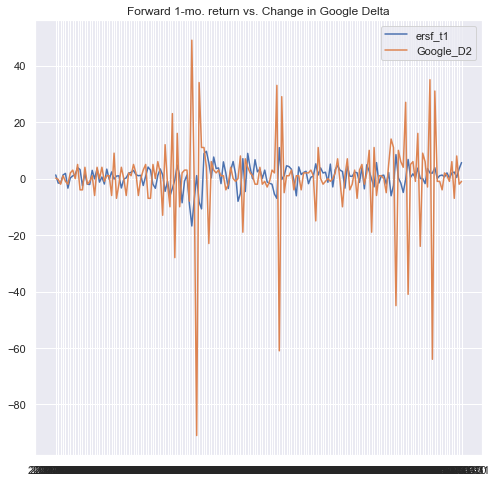

In [35]:
y = df04[['ersf_t1', 'Google_D2']]

sns.set()
fig = plt.figure(figsize=(8,8))
plt.plot(y)
plt.title('Forward 1-mo. return vs. Change in Google Delta')
plt.legend(y);

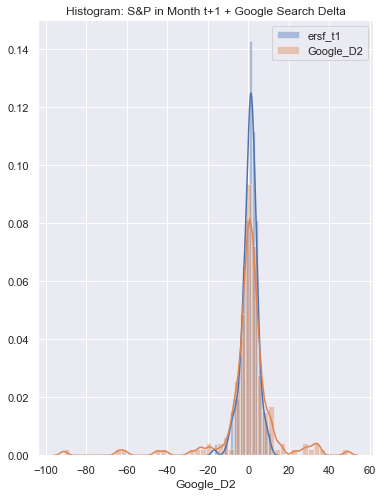

In [36]:
sns.set()
fig = plt.figure(figsize=(6,8))
ax1 = sns.distplot(df04['ersf_t1'])
ax2 = sns.distplot(df04['Google_D2']).set_title('Histogram: S&P in Month t+1 + Google Search Delta')
plt.legend(y);

In [37]:
#OLS multilinear regression modle with Google
lr_model_with_google_04_18 = ols(formula='ersf_t1~pd+ff12_D+vrp3+sent_x_ersf_D+Google_D2', data=df04).fit()
lr_model_with_google_04_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ersf_t1   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     17.12
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           1.42e-13
Time:                        15:05:07   Log-Likelihood:                -431.11
No. Observations:                 168   AIC:                             874.2
Df Residuals:                     162   BIC:                             893.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0135      3.044      1.976      0.050       0.003      12.024
pd               -0.1419      0.057     -2.509      0.013      -0.254      -0.030
ff12_D            1.6372      0.280      5.850      0.000       1.085       2.190
vrp3              0.1383      0.029      4.760      0.000       0.081       0.196
sent_x_ersf_D    -0.0094      0.004     -2.176      0.031      -0.018      -0.001
Google_D2        -0.0742      0.017     -4.295      0.000      -0.108      -0.040
==============================================================================
Omnibus:                        5.936   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.858
Skew:                          -0.457   Prob(JB):                       0.0534
Kurtosis:                       3.025   Cond. No.                         724.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#SK Learn OLS Model
ind_variables_w_google = ['pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D', 'Google_D2']
X_wG = pd.DataFrame(df04, columns=ind_variables_w_google)
y_wG = pd.DataFrame(df04, columns=['ersf_t1'])

sk_model_with_google_04_18 = linear_model.LinearRegression()
new_model = sk_model_with_google_04_18.fit(X_wG,y_wG)

In [39]:
predictions = new_model.predict(X_wG)
#2018-01 Prediction: 
predictions[-1]

array([0.5513969])

In [40]:
#R-Squared:
new_model.score(X_wG, y_wG)

0.3456563516515323

In [41]:
#Plot Residuals - Import modules
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

In [42]:
#Printing out the model Parameters
lr_model_with_google_04_18.params

Intercept        6.013536
pd              -0.141902
ff12_D           1.637231
vrp3             0.138259
sent_x_ersf_D   -0.009436
Google_D2       -0.074197
dtype: float64

In [43]:
#Fitted Values
model_fitted_y = lr_model_with_google_04_18.fittedvalues

#Model Residuals
model_residuals = lr_model_with_google_04_18.resid

#Normalized Residuals for QQ Plot
model_norm_residuals = lr_model_with_google_04_18.get_influence().resid_studentized_internal

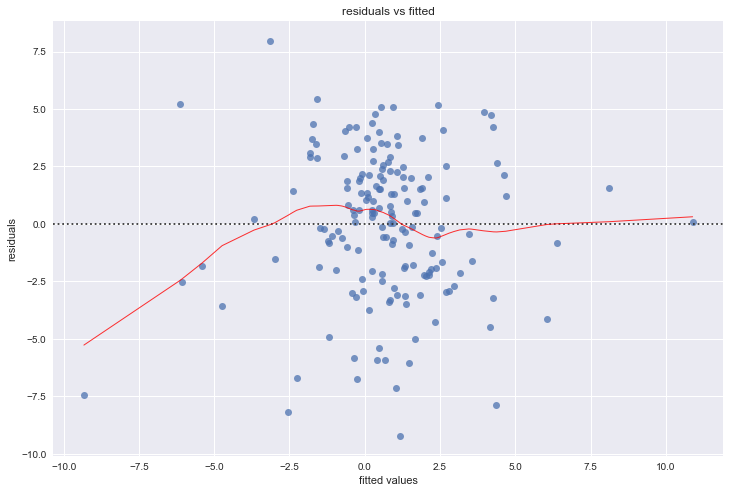

In [44]:
#Plotting Residuals vs. Fitted Values
plt.style.use('seaborn')
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'ersf_t1', data=df04, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.75}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('residuals vs fitted')
plot_lm_1.axes[0].set_xlabel('fitted values')
plot_lm_1.axes[0].set_ylabel('residuals');

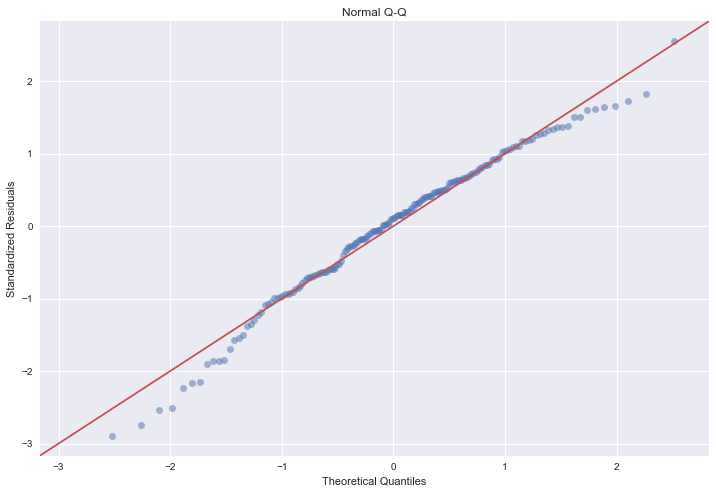

In [45]:
#QQ Plot
plt.style.use('seaborn')
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

In [46]:
#Calculating the Root Mean Squared Error on the Data
mse = mean_squared_error(df04['ersf_t1'], model_fitted_y)
rmse = np.sqrt(mse)
rmse

3.1494188690815306

## Run Model on 2018 Untrained Data

In [47]:
#DataFrame with Test Data
df_test = df0418['2017-12':'2018-12']

In [48]:
df_test

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Google_D2
Date,,,,,,,,,,,,,,,,,
2017-12-31,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,-2.3,3.482009,5.655427,3.054983,-7.026461,34.0,2.0,-1.0
2018-01-31,2823.810000,50.550000,0.001200,1.41,10.0329,95.7,55.861721,0.76,7.704133,-2.8,5.655427,-3.880980,2.173418,-6.085570,43.0,9.0,7.0
2018-02-28,2713.830000,50.690000,0.001358,1.42,-5.9018,99.7,53.537779,0.76,3.412800,3.4,-3.880980,-2.673728,-9.536407,-32.423784,88.0,45.0,36.0
2018-03-31,2640.870000,50.930000,0.001417,1.51,8.6653,101.4,51.852935,0.72,4.265467,4.5,-2.673728,0.279699,1.207253,5.432636,48.0,-40.0,-85.0
2018-04-30,2648.050000,51.070000,0.001533,1.69,-1.9751,98.8,51.851380,0.79,0.262800,1.8,0.279699,2.164429,2.953427,5.316169,43.0,-5.0,35.0
2018-05-31,2705.270000,51.190000,0.001575,1.70,9.4048,98.0,52.847626,0.79,5.365000,0.9,2.164429,0.485196,1.884729,1.696256,31.0,-12.0,-7.0
2018-06-30,2718.370000,51.440000,0.001575,1.82,13.2745,98.2,52.845451,0.78,6.901400,3.2,0.485196,3.595397,-1.679233,-5.373544,32.0,1.0,13.0
2018-07-31,2816.290000,51.890000,0.001658,1.91,8.1409,97.9,54.274234,0.76,10.273400,4.5,3.595397,3.008606,3.110201,13.995905,32.0,0.0,-1.0
2018-08-31,2901.520000,52.310000,0.001725,1.91,8.5030,96.2,55.467788,0.75,9.972800,-0.6,3.008606,0.401621,-0.586791,0.352075,33.0,1.0,1.0


In [49]:
#Create DF with last twelve months of actual returns
df18 = df_all['2018-01':'2019-01'][['ersf']]
df18

,ersf
Date,
2018-01-31,5.655427
2018-02-28,-3.880980
2018-03-31,-2.673728
2018-04-30,0.279699
2018-05-31,2.164429
2018-06-30,0.485196
2018-07-31,3.595397
2018-08-31,3.008606
2018-09-30,0.401621


In [50]:
#Select Indepdendent Variable from 2018 run, create DataFrame of Independent Variables
ind_variables = ['pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D', 'Google_D2']
X = pd.DataFrame(df_test,columns=ind_variables)
X

,pd,ff12_D,vrp3,sent_x_ersf_D,Google_D2
Date,,,,,
2017-12-31,54.639276,0.76,6.556300,-7.026461,-1.0
2018-01-31,55.861721,0.76,7.704133,-6.085570,7.0
2018-02-28,53.537779,0.76,3.412800,-32.423784,36.0
2018-03-31,51.852935,0.72,4.265467,5.432636,-85.0
2018-04-30,51.851380,0.79,0.262800,5.316169,35.0
2018-05-31,52.847626,0.79,5.365000,1.696256,-7.0
2018-06-30,52.845451,0.78,6.901400,-5.373544,13.0
2018-07-31,54.274234,0.76,10.273400,13.995905,-1.0
2018-08-31,55.467788,0.75,9.972800,0.352075,1.0


In [51]:
#Make Predictions with new Model (including Google D2)
predictions_2018 = lr_model_with_google_04_18.predict(X)
predictions_2018
len(predictions_2018)

Date
2017-12-31    0.551397
2018-01-31   -0.065824
2018-02-28   -2.232537
2018-03-31    6.679518
2018-04-30   -2.661559
2018-05-31    1.052914
2018-06-30   -0.167949
2018-07-31    0.918747
2018-08-31    0.671800
2018-09-30    0.956212
2018-10-31   -1.473285
2018-11-30    4.237992
dtype: float64

12

In [52]:
#Create Dataframe with Predictions
df_predictions = pd.DataFrame(predictions_2018)
df_predictions = df_predictions.rename(columns={0: 'pred_ret_next_mo'})

In [53]:
df_predictions

,pred_ret_next_mo
Date,
2017-12-31,0.551397
2018-01-31,-0.065824
2018-02-28,-2.232537
2018-03-31,6.679518
2018-04-30,-2.661559
2018-05-31,1.052914
2018-06-30,-0.167949
2018-07-31,0.918747
2018-08-31,0.671800


In [64]:
#Create Summary Dataframe with Predictions & Independent Variables
df_summary = X.copy()
df_summary = pd.concat([X.reset_index(), df_predictions.reset_index(drop=True)], axis=1)
df_summary = df_summary.merge(df18, how='outer', on='Date')
df_summary['ersf'] = df_summary['ersf'].shift(-1)
df_summary = df_summary.head(12)
df_summary

,Date,pd,ff12_D,vrp3,sent_x_ersf_D,Google_D2,pred_ret_next_mo,ersf
0,2017-12-31,54.639276,0.76,6.556300,-7.026461,-1.0,0.551397,5.655427
1,2018-01-31,55.861721,0.76,7.704133,-6.085570,7.0,-0.065824,-3.880980
2,2018-02-28,53.537779,0.76,3.412800,-32.423784,36.0,-2.232537,-2.673728
3,2018-03-31,51.852935,0.72,4.265467,5.432636,-85.0,6.679518,0.279699
4,2018-04-30,51.851380,0.79,0.262800,5.316169,35.0,-2.661559,2.164429
5,2018-05-31,52.847626,0.79,5.365000,1.696256,-7.0,1.052914,0.485196
6,2018-06-30,52.845451,0.78,6.901400,-5.373544,13.0,-0.167949,3.595397
7,2018-07-31,54.274234,0.76,10.273400,13.995905,-1.0,0.918747,3.008606
8,2018-08-31,55.467788,0.75,9.972800,0.352075,1.0,0.671800,0.401621
9,2018-09-30,55.293738,0.80,8.198900,-13.034925,-3.0,0.956212,-6.979372


In [65]:
lr_model_with_google_04_18.params

Intercept        6.013536
pd              -0.141902
ff12_D           1.637231
vrp3             0.138259
sent_x_ersf_D   -0.009436
Google_D2       -0.074197
dtype: float64

In [66]:
#Create Model Formula
B0 = lr_model_with_google_04_18.params['Intercept'] 
Bpd = lr_model_with_google_04_18.params['pd'] 
Bff = lr_model_with_google_04_18.params['ff12_D'] 
Bvrp = lr_model_with_google_04_18.params['vrp3']
Bse = lr_model_with_google_04_18.params['sent_x_ersf_D']
Bg = lr_model_with_google_04_18.params['Google_D2']

In [67]:
#Run Prediction model
for i in range(len(df_summary)):
    prediction = B0 + (Bpd * df_summary.iloc[i]['pd']) \
                + (Bff * df_summary.iloc[i]['ff12_D']) \
                + (Bvrp * df_summary.iloc[i]['vrp3'])  \
                + (Bse * df_summary.iloc[i]['sent_x_ersf_D']) \
                + (Bg * df_summary.iloc[i]['Google_D2']) \
    
    print(df_summary.iloc[i]['Date'], '--> Next Month prediction: ', prediction)

2017-12-31 --> Next Month prediction:  0.5513968980967039
2018-01-31 --> Next Month prediction:  -0.06582358556427925
2018-02-28 --> Next Month prediction:  -2.2325369836522384
2018-03-31 --> Next Month prediction:  6.679517969884811
2018-04-30 --> Next Month prediction:  -2.661559224641018
2018-05-31 --> Next Month prediction:  1.052914320351376
2018-06-30 --> Next Month prediction:  -0.16794916809354965
2018-07-31 --> Next Month prediction:  0.9187471885903385
2018-08-31 --> Next Month prediction:  0.6718000049231865
2018-09-30 --> Next Month prediction:  0.9562115516788454
2018-10-31 --> Next Month prediction:  -1.4732845577125209
2018-11-30 --> Next Month prediction:  4.237992489352247


In [68]:
mse = mean_squared_error(df_summary['ersf'], df_summary['pred_ret_next_mo'])
rmse = np.sqrt(mse)
rmse

5.614940968963646

In [69]:
#Add 'Correct' Column --> Simple Buy / Sell / Hold Signal (Buy if predicted return > 0) --> Was Model Correct?
df_summary['correct'] = (((df_summary['pred_ret_next_mo'] > 0) & (df_summary['ersf'] > 0)) \
                         | ((df_summary['pred_ret_next_mo'] < 0) & (df_summary['ersf'] < 0)))

In [70]:
#Create 'month' column that equals the month of actual returns to more clearly show month -> predicted return -> actual return
df_summary['month'] = df_summary['Date'].shift(-1)

In [71]:
df_summary = df_summary[['month', 'pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D', 'Google_D2', 'pred_ret_next_mo', 'ersf', 'correct']]

In [73]:
#HARDCODE December into NA value
df_summary.month.fillna('2018-12-31', inplace=True)
df_summary

,month,pd,ff12_D,vrp3,sent_x_ersf_D,Google_D2,pred_ret_next_mo,ersf,correct
0,2018-01-31,54.639276,0.76,6.556300,-7.026461,-1.0,0.551397,5.655427,True
1,2018-02-28,55.861721,0.76,7.704133,-6.085570,7.0,-0.065824,-3.880980,True
2,2018-03-31,53.537779,0.76,3.412800,-32.423784,36.0,-2.232537,-2.673728,True
3,2018-04-30,51.852935,0.72,4.265467,5.432636,-85.0,6.679518,0.279699,True
4,2018-05-31,51.851380,0.79,0.262800,5.316169,35.0,-2.661559,2.164429,False
5,2018-06-30,52.847626,0.79,5.365000,1.696256,-7.0,1.052914,0.485196,True
6,2018-07-31,52.845451,0.78,6.901400,-5.373544,13.0,-0.167949,3.595397,False
7,2018-08-31,54.274234,0.76,10.273400,13.995905,-1.0,0.918747,3.008606,True
8,2018-09-30,55.467788,0.75,9.972800,0.352075,1.0,0.671800,0.401621,True
9,2018-10-31,55.293738,0.80,8.198900,-13.034925,-3.0,0.956212,-6.979372,False


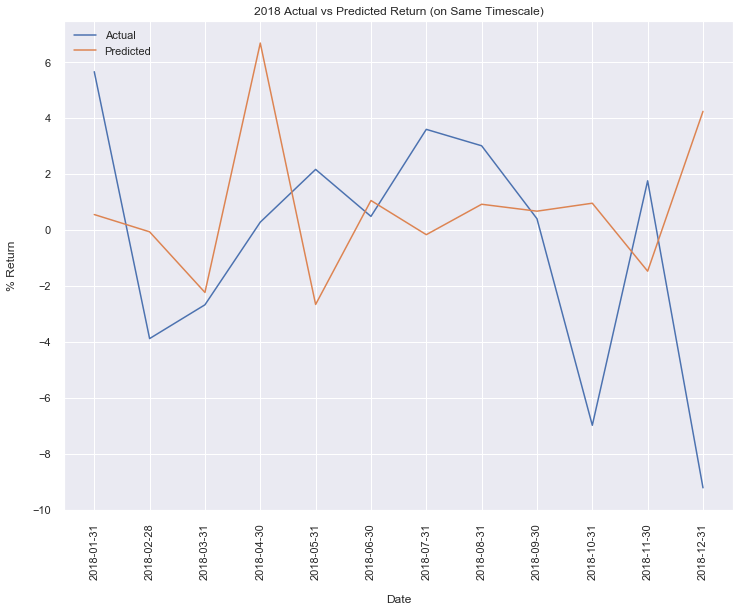

In [74]:
#Plott Actual Return vs Predicted Returns
sns.set()
x = df_summary['month']
fig = plt.figure(figsize=(12,9))
plt.plot(x, df_summary['ersf'])
plt.plot(x, df_summary['pred_ret_next_mo'])

plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.title('2018 Actual vs Predicted Return (on Same Timescale)')
plt.xticks(df_summary['month'], rotation='vertical')
plt.xlabel('Date', labelpad=15)
plt.ylabel('% Return', labelpad=15)

plt.show();
